In [7]:
import os
import optuna
from keras.utils import image_dataset_from_directory
import tensorflow as tf
from tensorflow import keras
from keras import layers
import matplotlib.pyplot as plt
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' # or any {‘0’, ‘1’, ‘2’}
train_dir = 'train'
validation_dir = 'validation'
test_dir = 'test'
train_airplane_dir = 'train/000_airplane'
train_automobile_dir = 'train/001_automobile'
train_bird_dir = 'train/002_bird'
train_cat_dir = 'train/003_cat'
train_deer_dir = 'train/004_deer'
train_dog_dir = 'train/005_dog'
train_frog_dir = 'train/006_frog'
train_horse_dir = 'train/007_horse'
train_ship_dir = 'train/008_ship'
train_truck_dir = 'train/009_truck'

validation_airplane_dir = 'validation/000_airplane'
validation_automobile_dir = 'validation/001_automobile'
validation_bird_dir = 'validation/002_bird'
validation_cat_dir = 'validation/003_cat'
validation_deer_dir = 'validation/004_deer'
validation_dog_dir = 'validation/005_dog'
validation_frog_dir = 'validation/006_frog'
validation_horse_dir = 'validation/007_horse'
validation_ship_dir = 'validation/008_ship'
validation_truck_dir = 'validation/009_truck'

test_airplane_dir = 'test/000_airplane'
test_automobile_dir = 'test/001_automobile'
test_bird_dir = 'test/002_bird'
test_cat_dir = 'test/003_cat'
test_deer_dir = 'test/004_deer'
test_dog_dir = 'test/005_dog'
test_frog_dir = 'test/006_frog'
test_horse_dir = 'test/007_horse'
test_ship_dir = 'test/008_ship'
test_truck_dir = 'test/009_truck'


print('total training airplane images:', len(os.listdir(train_airplane_dir)))
print('total training automobile images:', len(os.listdir(train_automobile_dir)))
print('total training bird images:', len(os.listdir(train_bird_dir)))
print('total training cat images:', len(os.listdir(train_cat_dir)))
print('total training deer images:', len(os.listdir(train_deer_dir)))
print('total training dog images:', len(os.listdir(train_dog_dir)))
print('total training frog images:', len(os.listdir(train_frog_dir)))
print('total training horse images:', len(os.listdir(train_horse_dir)))
print('total training ship images:', len(os.listdir(train_ship_dir)))
print('total training truck images:', len(os.listdir(train_truck_dir)))

print('total validation airplane images:', len(os.listdir(validation_airplane_dir)))
print('total validation automobile images:', len(os.listdir(validation_automobile_dir)))
print('total validation bird images:', len(os.listdir(validation_bird_dir)))
print('total validation cat images:', len(os.listdir(validation_cat_dir)))
print('total validation deer images:', len(os.listdir(validation_deer_dir)))
print('total validation dog images:', len(os.listdir(validation_dog_dir)))
print('total validation frog images:', len(os.listdir(validation_frog_dir)))
print('total validation horse images:', len(os.listdir(validation_horse_dir)))
print('total validation ship images:', len(os.listdir(validation_ship_dir)))
print('total validation truck images:', len(os.listdir(validation_truck_dir)))

print('total test airplane images:', len(os.listdir(test_airplane_dir)))
print('total test automobile images:', len(os.listdir(test_automobile_dir)))
print('total test bird images:', len(os.listdir(test_bird_dir)))
print('total test cat images:', len(os.listdir(test_cat_dir)))
print('total test deer images:', len(os.listdir(test_deer_dir)))
print('total test dog images:', len(os.listdir(test_dog_dir)))
print('total test frog images:', len(os.listdir(test_frog_dir)))
print('total test horse images:', len(os.listdir(test_horse_dir)))
print('total test ship images:', len(os.listdir(test_ship_dir)))
print('total test truck images:', len(os.listdir(test_truck_dir)))

total training airplane images: 3995
total training automobile images: 4026
total training bird images: 3968
total training cat images: 3984
total training deer images: 4001
total training dog images: 4063
total training frog images: 3970
total training horse images: 3999
total training ship images: 3975
total training truck images: 4019
total validation airplane images: 1005
total validation automobile images: 974
total validation bird images: 1032
total validation cat images: 1016
total validation deer images: 999
total validation dog images: 937
total validation frog images: 1030
total validation horse images: 1001
total validation ship images: 1025
total validation truck images: 981
total test airplane images: 2000
total test automobile images: 2000
total test bird images: 2000
total test cat images: 2000
total test deer images: 2000
total test dog images: 2000
total test frog images: 2000
total test horse images: 2000
total test ship images: 2000
total test truck images: 2000


In [8]:
from keras.utils import image_dataset_from_directory

IMG_SIZE = 32

train_dataset = image_dataset_from_directory(
    train_dir,
    label_mode='categorical',
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=20)

validation_dataset = image_dataset_from_directory(
    validation_dir,
    label_mode='categorical',
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=20)

test_dataset = image_dataset_from_directory(
    test_dir,
    label_mode='categorical',
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=20)

Found 40000 files belonging to 10 classes.
Found 10000 files belonging to 10 classes.
Found 10000 files belonging to 10 classes.


In [9]:
for data_batch, labels_batch in train_dataset:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 32, 32, 3)
labels batch shape: (20, 10)


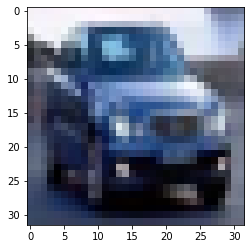

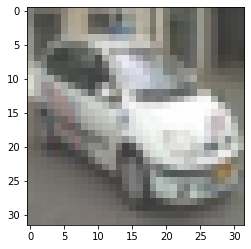

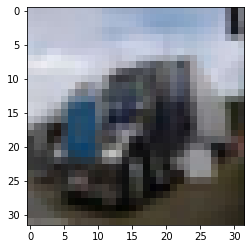

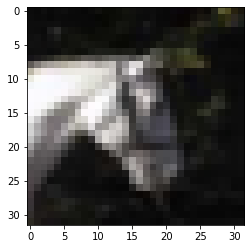

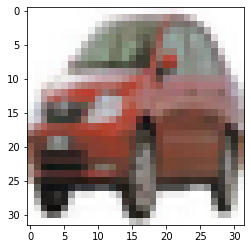

2024-06-21 18:24:32.173384: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [10]:
import matplotlib.pyplot as plt
for data_batch, _ in train_dataset.take(1):
    for i in range(5):
        plt.imshow(data_batch[i].numpy().astype("uint8"))
        plt.show()

In [15]:
# Define the objective function for Optuna
def objective(trial):
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-1)
    inputs = keras.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
    x = layers.Rescaling(1./255)(inputs)

    x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
    x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
    x = layers.MaxPooling2D(pool_size=2)(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
    x = layers.MaxPooling2D(pool_size=2)(x)
    x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
    x = layers.Dropout(0.5)(x)

    x = layers.Flatten()(x)
    x = layers.Dense(128, activation="relu")(x)
    outputs = layers.Dense(10, activation="softmax")(x)
    model = keras.Model(inputs=inputs, outputs=outputs)
    model.compile(loss='categorical_crossentropy',optimizer=tf.keras.optimizers.Adam(learning_rate),metrics=['acc'])
    callbacks_list = [
    keras.callbacks.EarlyStopping(monitor="val_loss",patience=10),
]
    history = model.fit(train_dataset,epochs=50,validation_data=validation_dataset,callbacks=callbacks_list)

    val_accuracy = max(history.history['val_acc'])
    return val_accuracy

In [16]:
# Create and run the Optuna study
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=10)

# Print the best learning rate found
print('Best learning rate: ', study.best_params['learning_rate'])

[I 2024-06-21 18:37:18,222] A new study created in memory with name: no-name-8a68396f-72dd-4c67-affa-ae0c40aeed33


Epoch 1/50


/tmp/ipykernel_280876/469863848.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-1)


2000/2000 ━━━━━━━━━━━━━━━━━━━━ 16s 5ms/step - acc: 0.1007 - loss: 2.3060 - val_acc: 0.0937 - val_loss: 2.3052
Epoch 2/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - acc: 0.0989 - loss: 2.3043 - val_acc: 0.0937 - val_loss: 2.3054
Epoch 3/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - acc: 0.1006 - loss: 2.3043 - val_acc: 0.0937 - val_loss: 2.3047
Epoch 4/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - acc: 0.1009 - loss: 2.3042 - val_acc: 0.0937 - val_loss: 2.3050
Epoch 5/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - acc: 0.0977 - loss: 2.3044 - val_acc: 0.0937 - val_loss: 2.3049
Epoch 6/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - acc: 0.0990 - loss: 2.3042 - val_acc: 0.0937 - val_loss: 2.3050
Epoch 7/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - acc: 0.1013 - loss: 2.3042 - val_acc: 0.0981 - val_loss: 2.3044
Epoch 8/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - acc: 0.0995 - loss: 2.3042 - val_acc: 0.0937 - val_loss: 2.3048
Epoch 9/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 1

[I 2024-06-21 18:40:24,438] Trial 0 finished with value: 0.09809999912977219 and parameters: {'learning_rate': 0.00873612279818701}. Best is trial 0 with value: 0.09809999912977219.


Epoch 1/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - acc: 0.0986 - loss: 2.3077 - val_acc: 0.0937 - val_loss: 2.3052
Epoch 2/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - acc: 0.1004 - loss: 2.3041 - val_acc: 0.0937 - val_loss: 2.3047
Epoch 3/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - acc: 0.0992 - loss: 2.3042 - val_acc: 0.0937 - val_loss: 2.3053
Epoch 4/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - acc: 0.1008 - loss: 2.3041 - val_acc: 0.0937 - val_loss: 2.3052
Epoch 5/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - acc: 0.1020 - loss: 2.3042 - val_acc: 0.0937 - val_loss: 2.3052
Epoch 6/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - acc: 0.0995 - loss: 2.3041 - val_acc: 0.0937 - val_loss: 2.3051
Epoch 7/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - acc: 0.0991 - loss: 2.3042 - val_acc: 0.0937 - val_loss: 2.3050
Epoch 8/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - acc: 0.0997 - loss: 2.3042 - val_acc: 0.1032 - val_loss: 2.3050
Epoch 9/50
2000/2000 ━━━━━━━━━━━

[I 2024-06-21 18:42:42,149] Trial 1 finished with value: 0.10320000350475311 and parameters: {'learning_rate': 0.00820945817406046}. Best is trial 1 with value: 0.10320000350475311.


Epoch 1/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - acc: 0.0964 - loss: 2.3066 - val_acc: 0.0937 - val_loss: 2.3054
Epoch 2/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - acc: 0.0995 - loss: 2.3043 - val_acc: 0.1032 - val_loss: 2.3052
Epoch 3/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - acc: 0.0986 - loss: 2.3045 - val_acc: 0.0937 - val_loss: 2.3051
Epoch 4/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - acc: 0.1014 - loss: 2.3045 - val_acc: 0.0937 - val_loss: 2.3054
Epoch 5/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - acc: 0.1011 - loss: 2.3044 - val_acc: 0.1032 - val_loss: 2.3049
Epoch 6/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - acc: 0.0986 - loss: 2.3046 - val_acc: 0.0937 - val_loss: 2.3053
Epoch 7/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - acc: 0.1004 - loss: 2.3045 - val_acc: 0.0937 - val_loss: 2.3046
Epoch 8/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - acc: 0.0996 - loss: 2.3044 - val_acc: 0.1032 - val_loss: 2.3051
Epoch 9/50
2000/2000 ━━━━━━━━━━━

[I 2024-06-21 18:45:51,678] Trial 2 finished with value: 0.10320000350475311 and parameters: {'learning_rate': 0.009860072761579833}. Best is trial 1 with value: 0.10320000350475311.


Epoch 1/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - acc: 0.2636 - loss: 1.9438 - val_acc: 0.4837 - val_loss: 1.4374
Epoch 2/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - acc: 0.4689 - loss: 1.4523 - val_acc: 0.5479 - val_loss: 1.2552
Epoch 3/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - acc: 0.5307 - loss: 1.3070 - val_acc: 0.5749 - val_loss: 1.1915
Epoch 4/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - acc: 0.5605 - loss: 1.2180 - val_acc: 0.6339 - val_loss: 1.0417
Epoch 5/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - acc: 0.5948 - loss: 1.1446 - val_acc: 0.6454 - val_loss: 0.9999
Epoch 6/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - acc: 0.6127 - loss: 1.0859 - val_acc: 0.6668 - val_loss: 0.9472
Epoch 7/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - acc: 0.6319 - loss: 1.0388 - val_acc: 0.6863 - val_loss: 0.8910
Epoch 8/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - acc: 0.6453 - loss: 0.9963 - val_acc: 0.6832 - val_loss: 0.8882
Epoch 9/50
2000/2000 ━━━━━━━━━━━

[I 2024-06-21 18:55:13,296] Trial 3 finished with value: 0.7710000276565552 and parameters: {'learning_rate': 0.0003311304204987209}. Best is trial 3 with value: 0.7710000276565552.


Epoch 1/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - acc: 0.1169 - loss: 2.2979 - val_acc: 0.1898 - val_loss: 2.1931
Epoch 2/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - acc: 0.1969 - loss: 2.1307 - val_acc: 0.2382 - val_loss: 2.0271
Epoch 3/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - acc: 0.2468 - loss: 2.0061 - val_acc: 0.2777 - val_loss: 1.9321
Epoch 4/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - acc: 0.2890 - loss: 1.9094 - val_acc: 0.3153 - val_loss: 1.8551
Epoch 5/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - acc: 0.3162 - loss: 1.8344 - val_acc: 0.3350 - val_loss: 1.8021
Epoch 6/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - acc: 0.3369 - loss: 1.7906 - val_acc: 0.3499 - val_loss: 1.7566
Epoch 7/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - acc: 0.3544 - loss: 1.7504 - val_acc: 0.3659 - val_loss: 1.7172
Epoch 8/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - acc: 0.3637 - loss: 1.7157 - val_acc: 0.3851 - val_loss: 1.6784
Epoch 9/50
2000/2000 ━━━━━━━━━━━

[I 2024-06-21 19:05:32,482] Trial 4 finished with value: 0.5706999897956848 and parameters: {'learning_rate': 1.2399260371677797e-05}. Best is trial 3 with value: 0.7710000276565552.


Epoch 1/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - acc: 0.2519 - loss: 1.9552 - val_acc: 0.3979 - val_loss: 1.6350
Epoch 2/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - acc: 0.4235 - loss: 1.5687 - val_acc: 0.4559 - val_loss: 1.5038
Epoch 3/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - acc: 0.4655 - loss: 1.4584 - val_acc: 0.5060 - val_loss: 1.4096
Epoch 4/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - acc: 0.4898 - loss: 1.4016 - val_acc: 0.4928 - val_loss: 1.4340
Epoch 5/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - acc: 0.5080 - loss: 1.3657 - val_acc: 0.5312 - val_loss: 1.3378
Epoch 6/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - acc: 0.5190 - loss: 1.3330 - val_acc: 0.5632 - val_loss: 1.2414
Epoch 7/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - acc: 0.5296 - loss: 1.3071 - val_acc: 0.5614 - val_loss: 1.2588
Epoch 8/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - acc: 0.5349 - loss: 1.2841 - val_acc: 0.5446 - val_loss: 1.2984
Epoch 9/50
2000/2000 ━━━━━━━━━━━

[I 2024-06-21 19:15:54,026] Trial 5 finished with value: 0.6625999808311462 and parameters: {'learning_rate': 0.0019963454553029837}. Best is trial 3 with value: 0.7710000276565552.


Epoch 1/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - acc: 0.2815 - loss: 1.8906 - val_acc: 0.4894 - val_loss: 1.3983
Epoch 2/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - acc: 0.4739 - loss: 1.4426 - val_acc: 0.5517 - val_loss: 1.2627
Epoch 3/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - acc: 0.5252 - loss: 1.3241 - val_acc: 0.5754 - val_loss: 1.1818
Epoch 4/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - acc: 0.5512 - loss: 1.2509 - val_acc: 0.6076 - val_loss: 1.1189
Epoch 5/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - acc: 0.5677 - loss: 1.2084 - val_acc: 0.6111 - val_loss: 1.0975
Epoch 6/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - acc: 0.5818 - loss: 1.1628 - val_acc: 0.6032 - val_loss: 1.1106
Epoch 7/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - acc: 0.5983 - loss: 1.1385 - val_acc: 0.6029 - val_loss: 1.1204
Epoch 8/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - acc: 0.6111 - loss: 1.1006 - val_acc: 0.6327 - val_loss: 1.0541
Epoch 9/50
2000/2000 ━━━━━━━━━━━

[I 2024-06-21 19:25:35,711] Trial 6 finished with value: 0.7038000226020813 and parameters: {'learning_rate': 0.0015484130848959427}. Best is trial 3 with value: 0.7710000276565552.


Epoch 1/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 18s 5ms/step - acc: 0.1095 - loss: 2.3056 - val_acc: 0.1906 - val_loss: 2.2669
Epoch 2/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - acc: 0.1775 - loss: 2.1954 - val_acc: 0.2650 - val_loss: 2.0247
Epoch 3/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - acc: 0.2515 - loss: 1.9954 - val_acc: 0.3080 - val_loss: 1.9236
Epoch 4/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - acc: 0.2977 - loss: 1.9041 - val_acc: 0.3278 - val_loss: 1.8549
Epoch 5/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - acc: 0.3219 - loss: 1.8377 - val_acc: 0.3476 - val_loss: 1.7929
Epoch 6/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - acc: 0.3399 - loss: 1.7937 - val_acc: 0.3656 - val_loss: 1.7514
Epoch 7/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - acc: 0.3538 - loss: 1.7522 - val_acc: 0.3717 - val_loss: 1.7195
Epoch 8/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - acc: 0.3649 - loss: 1.7212 - val_acc: 0.3866 - val_loss: 1.6806
Epoch 9/50
2000/2000 ━━━━━━━━━━━

[I 2024-06-21 19:34:12,891] Trial 7 finished with value: 0.5882999897003174 and parameters: {'learning_rate': 1.4386045151174011e-05}. Best is trial 3 with value: 0.7710000276565552.


Epoch 1/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - acc: 0.1565 - loss: 2.2117 - val_acc: 0.3048 - val_loss: 1.8973
Epoch 2/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - acc: 0.3118 - loss: 1.8445 - val_acc: 0.3638 - val_loss: 1.7348
Epoch 3/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - acc: 0.3642 - loss: 1.7177 - val_acc: 0.3988 - val_loss: 1.6379
Epoch 4/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - acc: 0.3944 - loss: 1.6241 - val_acc: 0.4357 - val_loss: 1.5506
Epoch 5/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - acc: 0.4253 - loss: 1.5612 - val_acc: 0.4593 - val_loss: 1.4923
Epoch 6/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - acc: 0.4474 - loss: 1.5093 - val_acc: 0.4717 - val_loss: 1.4502
Epoch 7/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - acc: 0.4624 - loss: 1.4699 - val_acc: 0.4901 - val_loss: 1.4019
Epoch 8/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - acc: 0.4687 - loss: 1.4471 - val_acc: 0.4947 - val_loss: 1.3817
Epoch 9/50
2000/2000 ━━━━━━━━━━━

[I 2024-06-21 19:42:30,518] Trial 8 finished with value: 0.6879000067710876 and parameters: {'learning_rate': 4.213528679488558e-05}. Best is trial 3 with value: 0.7710000276565552.


Epoch 1/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - acc: 0.2660 - loss: 1.9593 - val_acc: 0.4761 - val_loss: 1.4620
Epoch 2/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - acc: 0.4616 - loss: 1.4747 - val_acc: 0.5515 - val_loss: 1.2626
Epoch 3/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - acc: 0.5203 - loss: 1.3328 - val_acc: 0.5711 - val_loss: 1.2028
Epoch 4/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - acc: 0.5586 - loss: 1.2402 - val_acc: 0.6181 - val_loss: 1.0906
Epoch 5/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - acc: 0.5823 - loss: 1.1750 - val_acc: 0.6251 - val_loss: 1.0425
Epoch 6/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - acc: 0.6032 - loss: 1.1229 - val_acc: 0.6372 - val_loss: 1.0178
Epoch 7/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - acc: 0.6210 - loss: 1.0685 - val_acc: 0.6632 - val_loss: 0.9583
Epoch 8/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - acc: 0.6334 - loss: 1.0406 - val_acc: 0.6804 - val_loss: 0.9172
Epoch 9/50
2000/2000 ━━━━━━━━━━━━━━━━━━

[I 2024-06-21 19:49:42,936] Trial 9 finished with value: 0.7795000076293945 and parameters: {'learning_rate': 0.0002622037832120624}. Best is trial 9 with value: 0.7795000076293945.


Best learning rate:  0.0002622037832120624
